Meteorite_Landings_20240206.csv

In [1]:
from bs4 import BeautifulSoup                      ###libreria para web scraping
import pandas as pd                                ###libreria para manipular data
import requests                                    ###libreria para solicitar informcaion
import folium                                      ###libreria para situar puntos en mapa
import geonamescache
import reverse_geocode
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [2]:
df = pd.read_csv("Meteorite_Landings_20240206.csv")
df
dfcopy = df.copy()

In [3]:
dfcopy

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [4]:
dfcopy.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [5]:
dfcopy["nametype"].unique()

array(['Valid', 'Relict'], dtype=object)

In [6]:
nuevos_nombres = {'name': "nombre", 'id': "id", "nametype": 'tipo_nombre', "recclass": 'clase_meteorito', "mass (g)":'masa_gramos', "fall": 'encontrado', 'year': "año",
      "reclat": 'latitud', "reclong": 'longitud', "GeoLocation": 'localizacion'}
dfcopy = dfcopy.rename(columns=nuevos_nombres)

In [7]:
dfcopy["latitud"].fillna(0, inplace=True)
dfcopy["longitud"].fillna(0, inplace=True)

In [8]:
dfcopy["año"].fillna(0, inplace=True)

In [9]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           45716 non-null  object 
 1   id               45716 non-null  int64  
 2   tipo_nombre      45716 non-null  object 
 3   clase_meteorito  45716 non-null  object 
 4   masa_gramos      45585 non-null  float64
 5   encontrado       45716 non-null  object 
 6   año              45716 non-null  float64
 7   latitud          45716 non-null  float64
 8   longitud         45716 non-null  float64
 9   localizacion     38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [10]:
dfcopy.to_csv('dfcopy.csv', index=False)


In [11]:
dfcopy["masa_gramos"].fillna(0, inplace=True)

In [12]:
peso_colores = []
for index in dfcopy["masa_gramos"]:
    if index <= 200:
        peso_colores.append("green")
    elif 200 < index <750:
        peso_colores.append("yellow")
    elif 750 <= index < 1250:
        peso_colores.append("orange")
    elif 1250 <= index:
        peso_colores.append("red")
dfcopy['peso_colores'] = peso_colores


# GRAFICA 1

In [13]:
df_filtered = dfcopy[(dfcopy['latitud'] != 0) & (dfcopy['longitud'] != 0)]
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    lon = df_filtered['longitud'],
    lat = df_filtered['latitud'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'blue',
        opacity = 0.5)))
fig.update_geos(
    projection_type="natural earth",
    showland=True, landcolor="lightgray",
    showocean=True, oceancolor="lightblue",
    showcountries=True,
    showlakes=True, lakecolor="lightblue",
    showrivers=True, rivercolor="lightblue")
fig.write_html("mapa_plotly.html")


# GRAFICA 2

In [14]:
df_filtered = dfcopy[(dfcopy['latitud'] != 0) & (dfcopy['longitud'] != 0)]
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    lon = df_filtered['longitud'],
    lat = df_filtered['latitud'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = df_filtered["peso_colores"],
        opacity = 0.5)))
fig.update_geos(
    projection_type="natural earth",
    showland=True, landcolor="lightgray",
    showocean=True, oceancolor="lightblue",
    showcountries=True,
    showlakes=True, lakecolor="lightblue",
    showrivers=True, rivercolor="lightblue")
fig.write_html("mapa_plotly_peso_colores.html")

# GRAFICO 3

In [15]:
df_grafica_3 = dfcopy["peso_colores"].value_counts()
df_grafica_3 = pd.DataFrame(df_grafica_3)
print(df_grafica_3)
df_grafica_3["count"] = df_grafica_3["count"] / df_grafica_3["count"].sum() * 100
df_grafica_3.rename(columns={"count": "porcentaje"}, inplace=True)

df_grafica_3

              count
peso_colores       
green         34261
yellow         5766
red            4283
orange         1406


,porcentaje
peso_colores,
green,74.943127
yellow,12.612652
red,9.368711
orange,3.075510


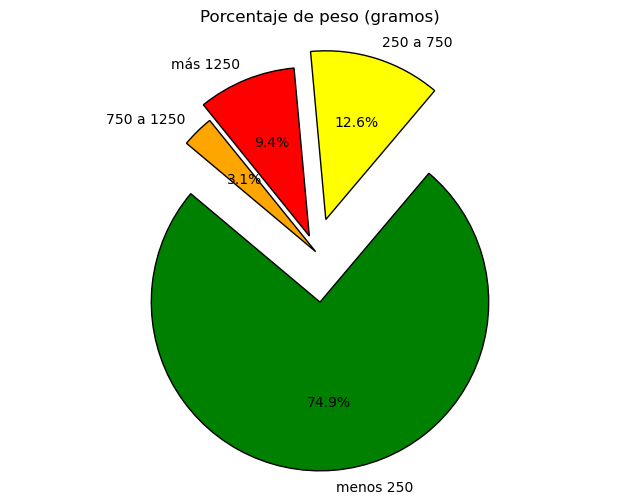

In [16]:
porcentajes = [74.943127, 12.612652, 9.368711, 3.075510]
colores = ['green', 'yellow', 'red', 'orange']
etiquetas = ['menos 250', '250 a 750', 'más 1250', '750 a 1250']
explode = (0.3, 0.2, 0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, colors=colores, explode=explode, labels=etiquetas, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Porcentaje de peso (gramos)')
plt.gca().set_facecolor('#d3d3d3')
plt.axis('equal')
plt.show()


# GRAFICO 4

In [17]:
dfcopy["año"] = dfcopy["año"].replace(2101.0, 2001)

In [18]:
dfcopy["año"].value_counts()

año
2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1519.0       1
1671.0       1
1833.0       1
1779.0       1
1792.0       1
Name: count, Length: 265, dtype: int64

In [19]:
grupo_años = []
for index in dfcopy["año"]:
    if 2002 <= index:
        grupo_años.append("2002-12")
    elif 1992 <= index < 2002:
        grupo_años.append("1992-02")
    elif 1982 <= index < 1992:
        grupo_años.append("1982-92")
    elif 1972 <= index < 1982:
        grupo_años.append("1972-82")
    elif 1962 <= index < 1972:
        grupo_años.append("1962-72")
    elif 1952 <= index < 1962:
        grupo_años.append("1952-62")
    elif 1942 <= index < 1952:
        grupo_años.append("1942-52")
    elif 1932 <= index < 1942:
        grupo_años.append("1932-42")
    elif 1922 <= index < 1932:
        grupo_años.append("1922-32")
    elif 1912 <= index < 1922:
        grupo_años.append("1912-22")
    elif 1902 <= index < 1912:
        grupo_años.append("1902-12")
    elif index < 1902:
        grupo_años.append("1902 antes")
    
dfcopy['grupo_años'] = grupo_años

In [20]:
dfcopy.info()
dfcopy.to_csv("dfcopy.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           45716 non-null  object 
 1   id               45716 non-null  int64  
 2   tipo_nombre      45716 non-null  object 
 3   clase_meteorito  45716 non-null  object 
 4   masa_gramos      45716 non-null  float64
 5   encontrado       45716 non-null  object 
 6   año              45716 non-null  float64
 7   latitud          45716 non-null  float64
 8   longitud         45716 non-null  float64
 9   localizacion     38401 non-null  object 
 10  peso_colores     45716 non-null  object 
 11  grupo_años       45716 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 4.2+ MB


In [21]:
df_grafica_4_valores = dfcopy["grupo_años"].value_counts()
df_grafica_4_valores = pd.DataFrame(df_grafica_4_valores)
df_grafica_4_valores.sort_index()
df_grafica_4_valores

,count
grupo_años,
2002-12,16278
1992-02,12667
1982-92,8602
1972-82,5487
1902 antes,1046
1962-72,437
1932-42,327
1952-62,209
1942-52,196


In [22]:
df_grafica_4 = dfcopy["grupo_años"].value_counts()
df_grafica_4 = pd.DataFrame(df_grafica_4)
df_grafica_4.sort_index()
df_grafica_4["count"] = df_grafica_4["count"] / df_grafica_4["count"].sum() * 100
df_grafica_4.rename(columns={"count": "porcentaje"}, inplace=True)
df_grafica_4

,porcentaje
grupo_años,
2002-12,35.606790
1992-02,27.708023
1982-92,18.816169
1972-82,12.002362
1902 antes,2.288039
1962-72,0.955902
1932-42,0.715286
1952-62,0.457170
1942-52,0.428734


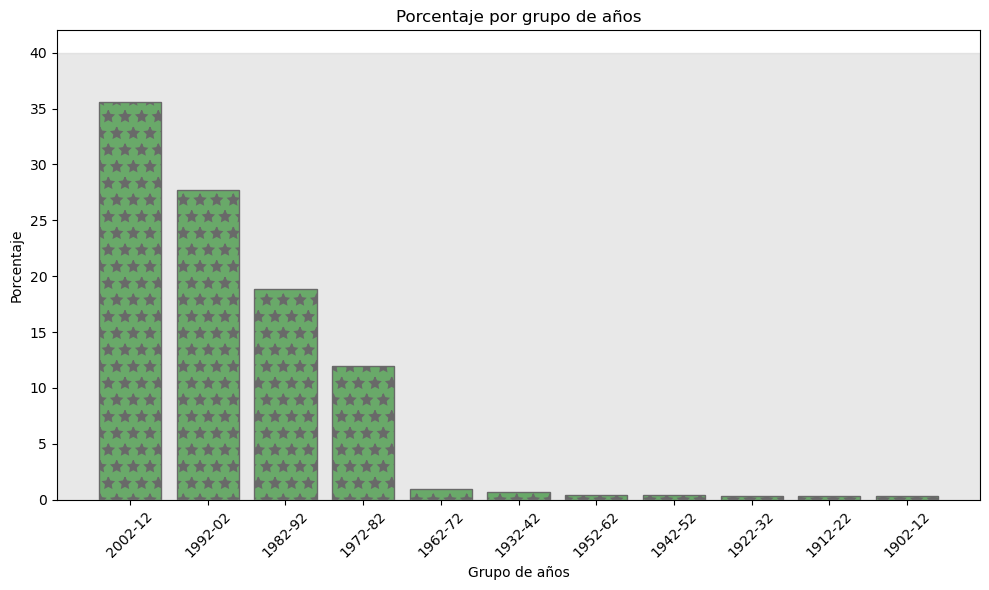

In [23]:
df_grafica_4_reindexado = df_grafica_4.reindex(['2002-12', '1992-02', '1982-92', '1972-82', '1962-72', '1932-42', '1952-62', '1942-52', '1922-32', '1912-22', '1902-12'])
plt.figure(figsize=(10, 6))
barras = plt.bar(df_grafica_4_reindexado.index, df_grafica_4_reindexado['porcentaje'], color='green', edgecolor='black', hatch='*')
for barra in barras:
    barra.set_linewidth(1)
plt.axhspan(ymin=0, 
            ymax=40, 
            color="lightgray", alpha=0.5)

plt.title('Porcentaje por grupo de años')
plt.xlabel('Grupo de años')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# GRAFICA 5

In [24]:
grafica_5 = dfcopy.pivot_table(index='grupo_años', columns='peso_colores', aggfunc='size', fill_value=0)
df_grafica_5 = pd.DataFrame(grafica_5)
df_grafica_5

peso_colores,green,orange,red,yellow
grupo_años,,,,
1902 antes,259,64,589,134
1902-12,11,11,104,18
1912-22,9,11,113,21
1922-32,20,9,124,16
1932-42,28,23,231,45
1942-52,20,17,126,33
1952-62,36,18,138,17
1962-72,122,24,234,57
1972-82,4737,84,310,356


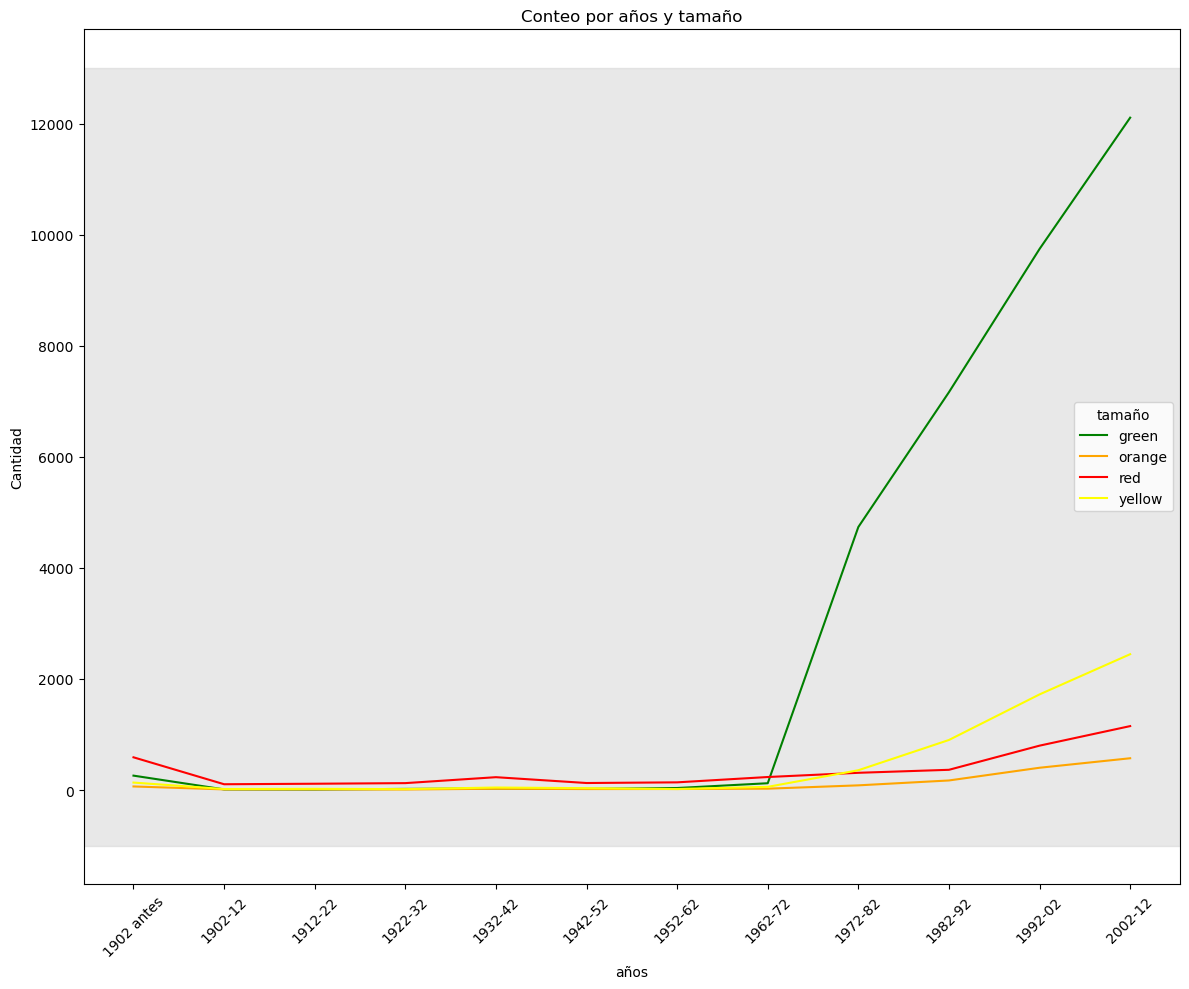

In [25]:
plt.figure(figsize=(12, 10))
for peso_color in df_grafica_5.columns:
    plt.plot(df_grafica_5.index, df_grafica_5[peso_color], color=peso_color, label=peso_color)
plt.axhspan(ymin=-1000, 
            ymax=13000, 
            color="lightgray", alpha=0.5)
plt.title('Conteo por años y tamaño')
plt.xlabel('años')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='tamaño')
plt.tight_layout()
plt.show()


In [26]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           45716 non-null  object 
 1   id               45716 non-null  int64  
 2   tipo_nombre      45716 non-null  object 
 3   clase_meteorito  45716 non-null  object 
 4   masa_gramos      45716 non-null  float64
 5   encontrado       45716 non-null  object 
 6   año              45716 non-null  float64
 7   latitud          45716 non-null  float64
 8   longitud         45716 non-null  float64
 9   localizacion     38401 non-null  object 
 10  peso_colores     45716 non-null  object 
 11  grupo_años       45716 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 4.2+ MB


In [27]:
import pandas as pd
import io
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable

geolocalizador = Nominatim(user_agent="geo_locator")


In [28]:
def obtener_pais(row):
    ubicacion = geolocalizador.reverse((row['latitud'], row['longitud']), exactly_one=True)
    if ubicacion:
        address = ubicacion.raw.get('address', {})
        country = address.get('country', 'indeterminado')
        row['country'] = country
    else:
        row['country'] = 'indeterminado'
    return row

In [29]:
dfcopy = dfcopy.apply(obtener_pais, axis=1)

KeyboardInterrupt: 

from geopy.geocoders import Nominatim
import time

def obtener_pais(latitud, longitud):
    geolocalizador = Nominatim(user_agent="geo_locator")
    ubicacion = geolocalizador.reverse((latitud, longitud), exactly_one=True)
    if ubicacion is not None:
        return ubicacion.address.split(",")[-1].strip()
    else:
        return "indeterminado"

paises = []
iteraciones_diarias = 0
limite_diario = 50000

# Variable para almacenar la última fila procesada con éxito
ultima_fila_exitosa = 0

while True:
    for index, fila in dfcopy.iterrows():
        # Verificar si se ha alcanzado el límite diario de iteraciones
        if iteraciones_diarias >= limite_diario:
            print("Se ha alcanzado el límite diario de iteraciones.")
            break
        
        try:
            # Llamar a la función obtener_pais para obtener el país
            pais = obtener_pais(fila["latitud"], fila["longitud"])
            paises.append(pais)
            
            # Actualizar la variable de la última fila procesada con éxito
            ultima_fila_exitosa = index
            
            # Incrementar el contador de iteraciones diarias
            iteraciones_diarias += 1
            
            # Imprimir el número de países obtenidos después de cada 100 iteraciones
            if len(paises) % 100 == 0:
                print("Países obtenidos hasta el momento:", len(paises))
                
            # Si el número de países obtenidos es un múltiplo de 100, pausar la ejecución durante 5 minutos
            if len(paises) % 100 == 0:
                print("Pausa de 5 minutos iniciada...")
                time.sleep(10)  # 5 minutos en segundos
        
        except Exception as e:
            # Imprimir el mensaje de error
            print("Se produjo un error:", e)
            print("Reanudando la iteración desde la última fila procesada con éxito + 1.")
            
            # Pausar la ejecución durante 5 minutos
            print("Pausa de 5 minutos iniciada...")
            time.sleep(300)  # 5 minutos en segundos
            
            # Continuar la iteración desde la última fila procesada con éxito + 1
            continue
    
    # Verificar si se ha alcanzado el límite diario de iteraciones
    if iteraciones_diarias >= limite_diario:
        print("Se ha alcanzado el límite diario de iteraciones.")
        break

print("Iteraciones completadas:", iteraciones_diarias)




In [ ]:
len(paises)

In [ ]:
del paises[45716:50001]


In [ ]:
len(paises)

In [ ]:
dfcopy["pais"] = paises

In [ ]:
dfcopy.to_csv("dfmeteoritos.csv")

In [ ]:
dfcopy.info()

In [ ]:
dfcopy["pais"].value_counts()

In [ ]:
dfcopy["pais"].unique()

In [ ]:
paises_ingles = ['Germany', 'Denmark', 'Canada',
                 'Mexico', 'Argentina', 'Pakistan',
                 'Mongolia', 'France', 'Mauritania',
                 'Niger', 'Jordan', 'India', 'Nigeria',
                 'Turkey', 'Saudi Arabia', 'Sudan',
                 'Italy', 'Democratic Republic of the Congo',
                 'United Kingdom', 'Syria', 'Ukraine',
                 'United States', 'Iraq', 'Soul Buoy',
                 'Brazil', 'Ethiopia', 'China', 'Japan',
                 'Algeria', 'Slovenia', 'Uganda',
                 'Central African Republic', 'Thailand', 'Indonesia',
                 'Spain', 'Russia', 'Poland',
                 'Ghana', 'Morocco', 'Tunisia',
                 'South Africa', 'Burkina Faso', 'Lebanon',
                 'Bangladesh', 'Australia', 'Finland',
                 'Czech Republic', 'Uzbekistan', 'Somalia',
                 'Romania', 'Serbia', 'Colombia',
                 'Philippines', 'Peru', 'Tanzania',
                 'Mali', 'Belarus', 'Switzerland',
                 'Laos', 'Malawi', 'Angola',
                 'Turkmenistan', 'Ecuador', 'Chad',
                 'Croatia', 'Ireland', 'Kenya',
                 'Indeterminate', 'Eswatini', 'Papua New Guinea',
                 'Sweden', 'Netherlands', 'Armenia',
                 'Cameroon', 'Norway', 'Slovakia',
                 'Bulgaria', 'South Korea', 'Costa Rica',
                 'Azerbaijan', 'Lithuania', 'Portugal',
                 'Hungary', 'Yemen', 'Afghanistan',
                 'South Sudan', 'Kazakhstan', 'Austria',
                 'Belgium', 'Latvia', 'Myanmar',
                 'Zimbabwe', 'Madagascar', 'New Zealand',
                 'Zambia', 'Sri Lanka', 'Egypt', 'Iran', 'Estonia', 'Namibia', 'Vietnam', 'Cambodia', 'Lesotho', 'Rwanda', 'Chile', 'Greece', 'Venezuela', 'Paraguay', 'Libya', 'Oman', 'Uruguay', 'Belgium 7904', 'Greenland', 'Guatemala', 'Cuba', 'Botswana', 'Qatar', 'Jamaica', 'Western Sahara', 'Bosnia and Herzegovina', 'Bolivia', 'Honduras', 'North Korea', 'Israel', 'United Arab Emirates']
len(paises_ingles)

In [ ]:
paises_idiomas = ['Deutschland', 'Danmark', 'Canada', 'México', 'Argentina',
       'پاکستان', 'Монгол улс ᠮᠤᠩᠭᠤᠯ ᠤᠯᠤᠰ', 'France', 'موريتانيا',
       'Niger', 'الأردن', 'India', 'Nigeria', 'Türkiye', 'السعودية',
       'السودان', 'Italia', 'République démocratique du Congo',
       'United Kingdom', 'سوريا', 'Україна', 'United States', 'العراق',
       'Soul Buoy', 'Brasil', 'ኢትዮጵያ', '中国', '日本',
       'Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر', 'Slovenija', 'Uganda',
       'Ködörösêse tî Bêafrîka / République centrafricaine', 'ประเทศไทย',
       'Indonesia', 'España', 'Россия', 'Polska', 'Ghana',
       'Maroc ⵍⵎⵖⵔⵉⴱ المغرب', 'تونس', 'South Africa', 'Burkina Faso',
       'لبنان', 'বাংলাদেশ', 'Australia', 'Suomi / Finland', 'Česko',
       'Oʻzbekiston', 'Soomaaliya الصومال', 'România', 'Србија',
       'Colombia', 'Philippines', 'Perú', 'Tanzania', 'Mali', 'Беларусь',
       'Schweiz/Suisse/Svizzera/Svizra', 'ປະເທດລາວ', 'Malawi', 'Angola',
       'Türkmenistan', 'Ecuador', 'Tchad تشاد', 'Hrvatska',
       'Éire / Ireland', 'Kenya', 'indeterminado', 'eSwatini',
       'Papua Niugini', 'Sverige', 'Nederland', 'Հայաստան', 'Cameroun',
       'Norge', 'Slovensko', 'България', '대한민국', 'Costa Rica',
       'Azərbaycan', 'Lietuva', 'Portugal', 'Magyarország', 'اليمن',
       'افغانستان', 'South Sudan جنوب السودان', 'Қазақстан', 'Österreich',
       'België / Belgique / Belgien', 'Latvija', 'မြန်မာ', 'Zimbabwe',
       'Madagasikara / Madagascar', 'New Zealand / Aotearoa', 'Zambia',
       'ශ්\u200dරී ලංකාව இலங்கை', 'مصر', 'ایران', 'Eesti', 'Namibia',
       'Việt Nam', 'ព្រះរាជាណាចក្រ\u200bកម្ពុជា', 'Lesotho', 'Rwanda',
       'Chile', 'Ελλάς', 'Venezuela', 'Paraguay / Paraguái', 'ليبيا',
       'عمان', 'Uruguay', 'Belgica 7904', 'Kalaallit Nunaat', 'Guatemala',
       'Cuba', 'Botswana', 'قطر', 'Jamaica',
       'República Árabe Saharaui Democrática الجمهورية العربية الصحراوية الديمقراطية',
       'Bosna i Hercegovina / Босна и Херцеговина', 'Bolivia', 'Honduras',
       '조선민주주의인민공화국', 'ישראל', 'الإمارات العربية المتحدة']
len(paises_idiomas)

In [ ]:
mapeo_paises = {}
for i in range(len(paises_idiomas)):
    mapeo_paises[paises_idiomas[i]] = paises_ingles[i]
mapeo_paises

In [ ]:
dfcopy["pais"] = dfcopy["pais"].map(mapeo_paises)

In [ ]:
dfcopy["pais"].unique()

In [ ]:
dfcopy.to_csv("dfmeteoritos.csv")

In [ ]:
grafica_8 = dfcopy.pivot_table(index='pais', columns=('peso_colores'), aggfunc='size', fill_value=0)
df_grafica_8 = pd.DataFrame(grafica_6)
df_grafica_8

In [ ]:
df_grafica_7 = df_grafica_6.sort_values(by="black", ascending=False).iloc[2:]
df_grafica_7 = df_grafica_7.head(10)
df_grafica_7

In [ ]:
plt.figure(figsize=(12, 10))
for peso_color in df_grafica_7.columns:
    plt.plot(df_grafica_7.index, df_grafica_7[peso_color], color=peso_color, label=peso_color)
plt.title('Conteo por años y tamaño')
plt.xlabel('PAIS')
plt.ylabel('CANTIDAD')
plt.xticks(rotation=45)
plt.legend(title='DIMENSION')
plt.tight_layout()
plt.show()

In [ ]:
dfcopy["pais"].value_counts()

In [ ]:
df_grafica_8['black'] = dfcopy["pais"].value_counts()
df_grafica_8

In [ ]:
plt.figure(figsize=(12, 6))
for peso_color in df_grafica_6.columns:
    plt.plot(df_grafica_6.index, df_grafica_6[peso_color], color=peso_color, label=peso_color)
plt.title('Conteo por años y tamaño')
plt.xlabel('pais')
plt.ylabel('Cantidad')
plt.xticks([])
plt.legend(title='tamaño')
plt.tight_layout()
plt.show()

In [ ]:
df_grafica_9_porcentaje = df_grafica_8.copy()
df_grafica_9_porcentaje["green"] = (df_grafica_8["green"].div(df_grafica_8["black"]) * 100).round(2)
df_grafica_9_porcentaje["yellow"] = (df_grafica_8["yellow"].div(df_grafica_8["black"]) * 100).round(2)
df_grafica_9_porcentaje["orange"] = (df_grafica_8["orange"].div(df_grafica_8["black"]) * 100).round(2)
df_grafica_9_porcentaje["red"] = (df_grafica_8["red"].div(df_grafica_8["black"]) * 100).round(2)

df_grafica_9_porcentaje


In [ ]:
df_grafica_9_porcentaje_bis = df_grafica_9_porcentaje.copy()
df_grafica_9_porcentaje_bis

In [ ]:
df_grafica_9_porcentaje_bis.head(10).mean()

In [ ]:
df_grafica_9_porcentaje_bis.head(10)

In [ ]:
valores = [44.150, 5.826, 30.429, 19.591]
colores = ["green", "orange", "red", "yellow"]
etiquetas = ["Green", "Orange", "Red", "Yellow"]
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('MEDIA TOP 10 PAISES')
plt.axis('equal')
plt.show()


In [ ]:
df_grafica_9_porcentaje_bis = df_grafica_9_porcentaje_bis.sort_values(by="black", ascending=False).iloc[2:]
df_grafica_9_porcentaje_bis

In [ ]:
df_grafica_10 = df_grafica_9_porcentaje_bis.copy()

In [ ]:
df_pastel_paises = pd.DataFrame(df_grafica_10.mean())
df_pastel_paises

In [ ]:
import matplotlib.pyplot as plt
valores = [24.187480, 9.502114, 51.363984, 14.946016]
colores = ["green", "orange", "red", "yellow"]
etiquetas = ["Green", "Orange", "Red", "Yellow"]
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('MEDIA TODOS LOS PAISES')
plt.axis('equal')
plt.show()


In [ ]:
df_index_pais = dfcopy["pais"].value_counts()
df_index_pais = pd.DataFrame(df_index_pais)
df_index_pais

In [ ]:
dfcopy["pais"] = paises

In [ ]:
url = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_superficie"

In [ ]:
r = requests.get(url)
r.status_code

In [ ]:
html = r.content

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
table_html = soup.find('table', attrs={'class': "wikitable sortable col3der"})
table_html

In [ ]:
df_pais_superficie = pd.read_html(table_html.prettify())[0]
df_pais_superficie

In [ ]:
url2 = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n"
r2 = requests.get(url2)
r2.status_code
html2 = r2.content
soup2 = BeautifulSoup(html2, 'html.parser')
print(soup2.prettify())
table_html2 = soup2.find('table', attrs={'class': "wikitable sortable"})
table_html2



In [ ]:
df_pais_poblacion = pd.read_html(table_html2.prettify())[0]
df_pais_poblacion

In [ ]:
nuevo_df = df_pais_poblacion[['País (o territorio dependiente)', 'Proyección  exponencial  de la  población  al  1/1/2024  [  7  ]  ​']]
nuevo_df

In [ ]:
nuevo_df = nuevo_df.rename(columns={"País (o territorio dependiente)": "pais"})
nuevo_df = nuevo_df.rename(columns={"Proyección  exponencial  de la  población  al  1/1/2024  [  7  ]  ​": "poblacion"})
nuevo_df

In [ ]:
nuevo_df["pais"].unique()

In [ ]:
nuevo_df["pais"] = [elemento.split(' ')[0] for elemento in nuevo_df["pais"]]
nuevo_df["pais"][0] = "China"
nuevo_df["pais"][2] = "Estados Unidos"
nuevo_df["pais"][11] = "República Democrática del Congo"
nuevo_df["pais"][10] = "Japón"
nuevo_df["pais"][45] = 'Arabia Saudita'
nuevo_df["pais"][48] = 'Costa de Marfil'
nuevo_df["pais"][57] = "Taiwán"
nuevo_df["pais"][60] = 'Sri Lanka'
nuevo_df["pais"][69] = "Paises Bajos"
nuevo_df["pais"][75] = "Guinea Ecuatorial"
nuevo_df["pais"][86] = "República Dominicana"
nuevo_df["pais"][96] = "Emiratos Arabes"
nuevo_df["pais"][100] = "Sierra Leona"
nuevo_df["pais"][103] = "Hong Kong"
nuevo_df["pais"][107] = "El Salvador"
nuevo_df["pais"][122] = "Nueva Zelanda"
nuevo_df["pais"][123] = "Csota Rica"
nuevo_df["pais"][135] = "Puerto Rico"
nuevo_df["pais"][146] = "Guinea Ecuatorial"
nuevo_df["pais"][155] = "Trinidad y Tobago"
nuevo_df["pais"][55] = "Mali"
nuevo_df["pais"][166] = "Islas Salomon"
nuevo_df["pais"][171] = "República Árabe Saharaui Democrática"
nuevo_df["pais"][183] = "Guayana Francesa"
nuevo_df["pais"][185] = "Polinesia Francesa"
nuevo_df["pais"][186] = "Nueva Caledonia"
nuevo_df["pais"][187] = "Santo Tomé y Príncipe"
nuevo_df["pais"][189] = "Santa Lucía"
nuevo_df["pais"][195] = "San Vicente y las Granadinas"
nuevo_df["pais"][200] = "Antillas Neerlandesas"
nuevo_df["pais"][201] = "Isla de Man"
nuevo_df["pais"][203] = "Islas Vírgenes de los Estados Unidos"
nuevo_df["pais"][218] = "San Marino"
nuevo_df["pais"][240] = "Ciudad del Vaticano"

nuevo_df["pais"].unique()


In [ ]:
lista_paises_traducida = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Mexico', 'Japan', 'Democratic Republic of the Congo', 'Philippines', 'Ethiopia', 'Egypt', 'Vietnam', 'Iran', 'Turkey', 'Germany', 'Thailand', 'Kingdom', 'France', 'Tanzania', 'South Africa', 'Italy', 'Burma', 'Kenya', 'Colombia', 'Korea', 'Sudan', 'Spain', 'Algeria', 'Argentina', 'Uganda', 'Iraq', 'Canada', 'Poland', 'Morocco', 'Uzbekistan', 'Ukraine', 'Afghanistan', 'Yemen', 'Angola', 'Peru', 'Malaysia', 'Saudi Arabia', 'Mozambique', 'Ghana', 'Ivory Coast', 'Madagascar', 'Nepal', 'Venezuela', 'Cameroon', 'Australia', 'Mali', 'Mali', 'Taiwan', 'Syria', 'Burkina', 'Sri Lanka', 'Zambia', 'Malawi', 'Kazakhstan', 'Chile', 'Romania', 'Somalia', 'Chad', 'Senegal', 'Netherlands', 'Guatemala', 'Ecuador', 'Cambodia', 'Zimbabwe', 'Equatorial Guinea', 'Rwanda', 'Benin', 'Burundi', 'Bolivia', 'Tunisia', 'Belgium', 'Haiti', 'Jordan', 'Cuba', 'Republic', 'Dominican Republic', 'Sweden', 'Portugal', 'Greece', 'Tajikistan', 'Azerbaijan', 'Honduras', 'Israel', 'Papua', 'Hungary', 'United Arab Emirates', 'Austria', 'Belarus', 'Switzerland', 'Sierra Leone', 'Togo', 'Laos', 'Hong Kong', 'Libya', 'Turkmenistan', 'Kyrgyzstan', 'El Salvador', 'Nicaragua', 'Serbia', 'Bulgaria', 'Paraguay', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Palestine', 'Slovakia', 'Liberia', 'Ireland', 'New Zealand', 'Costa Rica', 'Lebanon', 'Oman', 'Kuwait', 'Mauritania', 'Panama', 'Croatia', 'Eritrea', 'Georgia', 'Mongolia', 'Uruguay', 'Bosnia', 'Puerto Rico', 'Armenia', 'Qatar', 'Lithuania', 'Jamaica', 'Albania', 'Namibia', 'Gambia', 'Moldova', 'Botswana', 'Gabon', 'Slovenia', 'Lesotho', 'Latvia', 'Macedonia', 'Guinea-Bissau', 'Kosovo', 'Bahrain', 'Estonia', 'Trinidad and Tobago', 'Timor', 'Mauritius', 'Swaziland', 'Djibouti', 'Cyprus', 'Fiji', 'Reunion', 'Comoros', 'Guyana', 'Bhutan', 'Solomon Islands', 'Macao', 'Luxembourg', 'Suriname', 'Montenegro', 'Western Sahara', 'Cape Verde', 'Malta', 'Maldives', 'Belize', 'Brunei', 'Bahamas', 'Iceland', 'Guadeloupe', 'Martinique', 'Mayotte', 'Vanuatu', 'French Guiana', 'Barbados', 'French Polynesia', 'New Caledonia', 'Sao Tome and Principe', 'Samoa', 'Saint Lucia', 'Guam', 'Curacao', 'Grenada', 'Kiribati', 'Seychelles', 'Saint Vincent and the Grenadines', 'Aruba', 'Micronesia', 'Jersey', 'Tonga', 'Netherlands Antilles', 'Isle of Man', 'Andorra', 'United States Virgin Islands', 'Islands', 'Dominica', 'Guernsey', 'Bermuda', 'Greenland', 'San', 'Liechtenstein', 'Monaco', 'San Marino', 'Gibraltar', 'Aland', 'Caribbean', 'Palau', 'Anguilla', 'Nauru', 'Tuvalu', 'Wallis', 'Holy', 'Montserrat', 'Svalbard', 'Island', 'Niue', 'Tokelau', 'Vatican City', 'World', 'Country']
nuevo_df["pais"] = lista_paises_traducida

In [ ]:
dfcopy["pais"].unique()

In [ ]:
population = {
    'Germany': 83783942,
    'Denmark': 5818553,
    'Canada': 38233000,
    'Mexico': 126190788,
    'Argentina': 45605886,
    'Pakistan': 225199937,
    'Mongolia': 3278292,
    'France': 67059887,
    'Mauritania': 4649658,
    'Niger': 23310715,
    'Jordan': 10069794,
    'India': 1393409038,
    'Nigeria': 206139587,
    'Turkey': 84495243,
    'Saudi Arabia': 35041038,
    'Sudan': 43849260,
    'Italy': 60367482,
    'Democratic Republic of the Congo': 92376887,
    'United Kingdom': 68207116,
    'Syria': 17500658,
    'Ukraine': 43733759,
    'United States': 331002651,
    'Iraq': 40222493,
    'Soul Buoy': None,
    'Brazil': 212559417,
    'Ethiopia': 114963588,
    'China': 1439323776,
    'Japan': 126476461,
    'Algeria': 43851044,
    'Slovenia': 2078938,
    'Uganda': 45741007,
    'Central African Republic': 4829767,
    'Thailand': 69799978,
    'Indonesia': 273523615,
    'Spain': 46754778,
    'Russia': 145934462,
    'Poland': 37846611,
    'Ghana': 31072940,
    'Morocco': 36910560,
    'Tunisia': 11818619,
    'South Africa': 59308690,
    'Burkina Faso': 20903273,
    'Lebanon': 6825442,
    'Bangladesh': 164689383,
    'Australia': 25499884,
    'Finland': 5540720,
    'Czech Republic': 10708981,
    'Uzbekistan': 33469203,
    'Somalia': 15893222,
    'Romania': 19237691,
    'Serbia': 8737371,
    'Colombia': 50882891,
    'Philippines': 109581078,
    'Peru': 32971846,
    'Tanzania': 59734218,
    'Mali': 20250833,
    'Belarus': 9449323,
    'Switzerland': 8654622,
    'Laos': 7275560,
    'Malawi': 19129952,
    'Angola': 32866272,
    'Turkmenistan': 6031187,
    'Ecuador': 17643054,
    'Chad': 16425859,
    'Croatia': 4105267,
    'Ireland': 4937786,
    'Kenya': 53771296,
    'Indeterminate': None,
    'Eswatini': 1160164,
    'Papua New Guinea': 8947024,
    'Sweden': 10099265,
    'Netherlands': 17134872,
    'Armenia': 2963243,
    'Cameroon': 26545863,
    'Norway': 5421241,
    'Slovakia': 5459642,
    'Bulgaria': 6948445,
    'South Korea': 51269185,
    'Costa Rica': 5094118,
    'Azerbaijan': 10139177,
    'Lithuania': 2722289,
    'Portugal': 10196709,
    'Hungary': 9660351,
    'Yemen': 29825968,
    'Afghanistan': 38928346,
    'South Sudan': 11193729,
    'Kazakhstan': 18776707,
    'Austria': 9006398,
    'Belgium': 11589623,
    'Latvia': 1886198,
    'Myanmar': 54409800,
    'Zimbabwe': 14862924,
    'Madagascar': 27691019,
    'New Zealand': 4822233,
    'Zambia': 18383955,
    'Sri Lanka': 21413249,
    'Egypt': 102334404,
    'Iran': 83992949,
    'Estonia': 1326535,
    'Namibia': 2540905,
    'Vietnam': 97338579,
    'Cambodia': 16718965,
    'Lesotho': 2142249,
    'Rwanda': 12952218,
    'Chile': 19116201,
    'Greece': 10423054,
    'Venezuela': 28435940,
    'Paraguay': 7132530,
    'Libya': 6871292,
    'Oman': 5106622,
    'Uruguay': 3473727,
    'Belgium 7904': None,
    'Greenland': 56770,
    'Guatemala': 17915568,
    'Cuba': 11326616,
    'Botswana': 2351627,
    'Qatar': 2881060,
    'Jamaica': 2961167,
    'Western Sahara': 597339,
    'Bosnia and Herzegovina': 3280819,
    'Bolivia': 11673029,
    'Honduras': 9904607,
    'North Korea': 25778816,
    'Israel': 8655535,
    'United Arab Emirates': 9890402
}


In [ ]:
df_grafica_poblacion = df_grafica_8.copy()
df_grafica_poblacion.sort_index()

In [ ]:
df_grafica_poblacion.reset_index(inplace=True)
df_grafica_poblacion['population'] = df_grafica_poblacion['pais'].replace(population)
df_grafica_poblacion



In [ ]:
df_grafica_poblacion.set_index('pais', inplace=True)


In [ ]:
df_grafica_poblacion.drop(columns=['index'], inplace=True)
df_grafica_poblacion

In [ ]:
extensiones_territoriales = {
    'Denmark': 43094,
    'Canada': 9984670,
    'Mexico': 1964375,
    'Argentina': 2780400,
    'Pakistan': 881913,
    'Mongolia': 1564110,
    'France': 551695,
    'Mauritania': 1030700,
    'Niger': 1267000,
    'Jordan': 89342,
    'India': 3287263,
    'Nigeria': 923768,
    'Turkey': 783562,
    'Saudi Arabia': 2149690,
    'Sudan': 1861484,
    'Italy': 301340,
    'Democratic Republic of the Congo': 2345095,
    'United Kingdom': 243610,
    'Syria': 185180,
    'Ukraine': 603500,
    'United States': 9833517,
    'Iraq': 437072,
    'Soul Buoy': 0,  # No reconocido
    'Brazil': 8515767,
    'Ethiopia': 1104300,
    'China': 9596961,
    'Japan': 377975,
    'Algeria': 2381741,
    'Slovenia': 20273,
    'Uganda': 241551,
    'Central African Republic': 622984,
    'Thailand': 513120,
    'Indonesia': 1904569,
    'Spain': 505992,
    'Russia': 17098242,
    'Poland': 312696,
    'Ghana': 238533,
    'Morocco': 446550,
    'Tunisia': 163610,
    'South Africa': 1221037,
    'Burkina Faso': 274200,
    'Lebanon': 10452,
    'Bangladesh': 147570,
    'Australia': 7692024,
    'Finland': 338424,
    'Czech Republic': 78867,
    'Uzbekistan': 447400,
    'Somalia': 637657,
    'Romania': 238397,
    'Serbia': 77474,
    'Colombia': 1141748,
    'Philippines': 300000,
    'Peru': 1285216,
    'Tanzania': 945087,
    'Mali': 1240192,
    'Belarus': 207600,
    'Switzerland': 41284,
    'Laos': 236800,
    'Malawi': 118484,
    'Angola': 1246700,
    'Turkmenistan': 488100,
    'Ecuador': 276841,
    'Chad': 1284000,
    'Croatia': 56542,
    'Ireland': 70273,
    'Kenya': 580367,
    'Indeterminate': 0,  # No reconocido
    'Eswatini': 17364,
    'Papua New Guinea': 462840,
    'Sweden': 450295,
    'Netherlands': 41543,
    'Armenia': 29743,
    'Cameroon': 475442,
    'Norway': 323802,
    'Slovakia': 49035,
    'Bulgaria': 110879,
    'South Korea': 100210,
    'Costa Rica': 51100,
    'Azerbaijan': 86600,
    'Lithuania': 65300,
    'Portugal': 92090,
    'Hungary': 93028,
    'Yemen': 527968,
    'Afghanistan': 652230,
    'South Sudan': 619745,
    'Kazakhstan': 2724900,
    'Austria': 83871,
    'Belgium': 30528,
    'Latvia': 64589,
    'Myanmar': 676578,
    'Zimbabwe': 390757,
    'Madagascar': 587041,
    'New Zealand': 270467,
    'Zambia': 752612,
    'Sri Lanka': 65610,
    'Egypt': 1002450,
    'Iran': 1648195,
    'Estonia': 45227,
    'Namibia': 824292,
    'Vietnam': 331210,
    'Cambodia': 181035,
    'Lesotho': 30355,
    'Rwanda': 26338,
    'Chile': 756102,
    'Greece': 131957,
    'Venezuela': 916445,
    'Paraguay': 406752,
    'Libya': 1759540,
    'Oman': 309500,
    'Uruguay': 176215,
    'Belgium 7904': 0,  # No reconocido
    'Greenland': 2166086,
    'Guatemala': 108889,
    'Cuba': 109884,
    'Botswana': 581730,
    'Qatar': 11586,
    'Jamaica': 10991,
    'Western Sahara': 266000,
    'Bosnia and Herzegovina': 51197,
    'Bolivia': 1098581,
    'Honduras': 112492,
    'North Korea': 120538,
    'Israel': 20770,
    'United Arab Emirates': 83600,
    'Germany': 357386}
print(len(extensiones_territoriales))

In [ ]:
df_grafica_poblacion.reset_index(inplace=True)
df_grafica_poblacion['superficie'] = df_grafica_poblacion['pais'].replace(extensiones_territoriales)
df_grafica_poblacion

In [ ]:
df_grafica_poblacion.set_index('pais', inplace=True)

In [ ]:
df_grafica_poblacion
df_grafica_poblacion.to_csv("df grafica poblacion.csv")

In [ ]:
df_grafica_poblacion.info()

In [ ]:
df_grafica_final = df_grafica_poblacion.copy()

In [ ]:
df_grafica_final.rename(columns={"population": "poblacion"})

In [ ]:
df_grafica_final["superficie/meterito"] = df_grafica_poblacion["superficie"] / df_grafica_poblacion["black"]
df_grafica_final["poblacion/meterito"] = df_grafica_poblacion["population"] / df_grafica_poblacion["black"]

In [ ]:
df_grafica_final.info()

In [ ]:
df_grafica_final

In [ ]:
dfcopy

In [ ]:
dfcopy["clase_meteorito"].value_counts()

In [ ]:
dfcopy.to_csv("dfcopy.csv")